In [1]:
%run ../../utils/commonImports.py
%run ../../utils/tradingImports.py
%matplotlib inline

# Load Data

In [8]:
X_train, y_train, X_val, y_val, X_test, y_test = load_split("D:\\Dropbox\\My work\\krypl-project\\dataSplit\\return-01-loss-max-01-within-day")

# Test Train Validation Split

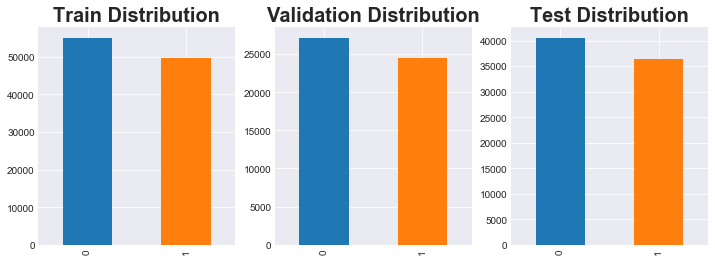

In [9]:
fig, axes = plt.subplots(1, 3, figsize=[12, 4])
y_train.value_counts().plot(kind='bar', ax=axes[0])
axes[0].set_title('Train Distribution', fontproperties=title_font)
y_val.value_counts().plot(kind='bar', ax=axes[1])
axes[1].set_title('Validation Distribution', fontproperties=title_font)
y_test.value_counts().plot(kind='bar', ax=axes[2])
axes[2].set_title('Test Distribution', fontproperties=title_font);

In [10]:
X_train.describe()

,return,return_1,return_2,zscore_36_return,zscore_288_return,zscore_36_volume,zscore_288_volume,zscore_2016_volume,pma36,pma288,...,vma2016,ma_12_108,ma_36_288,ac36,ac288,vol36,vol288,vol2016,dv_36_288,dv_288_2016
count,"104,716.0000","104,716.0000","104,716.0000","104,716.0000","104,716.0000","104,716.0000","104,716.0000","104,716.0000","104,716.0000","104,716.0000",...,"104,716.0000","104,716.0000","104,716.0000","104,716.0000","104,716.0000","104,716.0000","104,716.0000","104,716.0000","104,716.0000","104,716.0000"
mean,0.0000,0.0000,0.0000,"8,271.5953",0.0009,116.5503,0.0637,0.0434,-0.0003,-0.0069,...,0.0562,-0.0053,-0.0093,-0.0027,0.0201,0.1081,-0.0446,-0.0147,0.1299,0.0070
std,0.0041,0.0043,0.0043,"2,362,788.5550",1.0987,"36,962.6636",2.6461,1.6196,1.1814,1.3857,...,2.6047,1.2939,1.4364,1.2684,1.6957,1.2775,1.6555,1.7275,1.2766,1.6457
min,-0.1287,-0.1287,-0.1448,"-58,492,601.6095",-37.0992,-9.9937,-1.5648,-1.2247,-18.1615,-17.8795,...,-1.5274,-13.1387,-12.0290,-33.4562,-5.3630,-5.2108,-28.5338,-24.7217,-5.0617,-12.3191
25%,-0.0002,-0.0002,-0.0002,-0.1900,-0.0930,-0.4534,-0.3539,-0.3132,-0.6189,-0.9489,...,-0.3548,-0.7615,-0.9964,-0.7086,-1.5107,-0.7488,-1.3458,-1.3927,-0.7293,-1.3137
50%,0.0000,0.0000,0.0000,-0.0024,-0.0038,-0.2576,-0.2001,-0.1938,0.0120,-0.0078,...,-0.2017,-0.0079,-0.0135,0.0052,0.0710,-0.1072,-0.1187,-0.0774,-0.0968,-0.0086
75%,0.0004,0.0004,0.0004,0.1972,0.1282,-0.0817,-0.0727,-0.0584,0.6266,0.9473,...,-0.0751,0.7468,0.9907,0.7016,1.5361,0.7976,1.2731,1.3962,0.8080,1.3060
max,0.1477,0.2598,0.2598,"743,485,878.8337",30.8541,"11,960,939.4582",307.2356,291.5194,23.3451,14.6661,...,385.3693,33.9406,9.1410,33.4555,4.8364,16.9411,13.9239,19.5511,17.1373,14.4058


# Decision Tree

In [11]:
import time
from modeling.gridsearch import GridSearch
from sklearn.tree import DecisionTreeClassifier
from sklearn.externals import joblib

params_to_train = {
    'max_depth': [5, 8, 10, 12, 15, 18, 20, 25, 30, 35, 40],
    'min_samples_split': [2, 5, 10, 30, 50],
    'class_weight': ['balanced']
}

grid_search = GridSearch(DecisionTreeClassifier, params_to_train)
grid_search.fit_all(X_train, y_train)

path = "D:\\Dropbox\\My work\\krypl-project\\models\\return-01-loss-max-01-within-day\\"
joblib.dump(grid_search, f'{path}\\tree_search.pkl');

train [0/55] {'max_depth': 5, 'min_samples_split': 2, 'class_weight': 'balanced'}........................... 2.63 sec
train [1/55] {'max_depth': 5, 'min_samples_split': 5, 'class_weight': 'balanced'}........................... 2.73 sec
train [2/55] {'max_depth': 5, 'min_samples_split': 10, 'class_weight': 'balanced'}........................... 3.27 sec
train [3/55] {'max_depth': 5, 'min_samples_split': 30, 'class_weight': 'balanced'}........................... 2.58 sec
train [4/55] {'max_depth': 5, 'min_samples_split': 50, 'class_weight': 'balanced'}........................... 2.89 sec
train [5/55] {'max_depth': 8, 'min_samples_split': 2, 'class_weight': 'balanced'}........................... 4.95 sec
train [6/55] {'max_depth': 8, 'min_samples_split': 5, 'class_weight': 'balanced'}........................... 3.33 sec
train [7/55] {'max_depth': 8, 'min_samples_split': 10, 'class_weight': 'balanced'}........................... 4.03 sec
train [8/55] {'max_depth': 8, 'min_samples_split': 3